In [1]:
import numpy as np


# 二乗和誤差関数
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)


# 正解ラベル
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 計算結果
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


In [2]:
# 交差エントロピー誤差関数
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))


t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.10, 0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


In [3]:
# ミニバッチ学習
import sys, os

sys.path.append(os.path.join(os.pardir, "deep-learning-from-scratch"))
from dataset.mnist import load_mnist
import numpy as np

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

(60000, 784)
(60000, 10)


In [4]:
# [バッチ対応版] 交差エントロピー誤差の実装
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [5]:
# 4.3 数値微分
## 4.3.1 微分


def numerical_diff(f, x):
    h = 1e-4
    return f(x + h) - f(x - h) / (2 * h)

0.1999999999990898


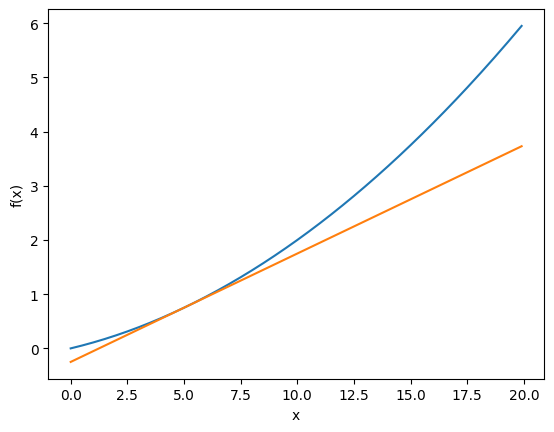

In [6]:
## 4.3.2 数値微分の例
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)


def function_1(x):
    return 0.01 * x**2 + 0.1 * x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [7]:
## 4.3.3 偏微分
def function_2(x):
    return x[0] ** 2 + x[1] ** 2
    # または return np.sum(x**2)


def function_tmp1(x0):
    return x0 * x0 + 4.0**2.0


numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [8]:
import numpy as np


def numerical_gradient(f, x):
    h = 1e-4  # 0.0001 という微小な値（微分用の小さな幅）

    # xと同じ形状で、中身が全部0の配列を作る（結果を入れるための空箱）
    # 例: xが[3.0, 4.0]なら、gradはとりあえず[0.0, 0.0]にしておく
    grad = np.zeros_like(x)

    # 【ここからループ】変数の数だけ繰り返す（例: x0, x1, x2... と順番に）
    for idx in range(x.size):

        # --- 1. 元の値を退避 ---
        # 今からいじる変数（x[idx]）の元の値をメモしておく
        # 例: x[0]の 3.0 を tmp_val に保存
        tmp_val = x[idx]

        # --- 2. [f(x+h)] の計算 ---
        # 注目している変数だけ少し増やす（他の変数はそのまま！）
        # 例: x は [3.0001, 4.0] になる
        x[idx] = tmp_val + h
        fxh1 = f(x)  # その状態で関数を実行し、結果を記録

        # --- 3. [f(x-h)] の計算 ---
        # 注目している変数だけ少し減らす
        # 例: x は [2.9999, 4.0] になる
        x[idx] = tmp_val - h
        fxh2 = f(x)  # その状態で関数を実行し、結果を記録

        # --- 4. 傾きの計算 ---
        # (f(x+h) - f(x-h)) / 2h という公式で、この変数の傾きを確定させて箱に入れる
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        # --- 5. お片付け（超重要）---
        # いじくり回した x[idx] を元の値（3.0）に戻す
        # これをしないと、次の x[1] の計算のときに x[0] がズレたままになってしまう！
        x[idx] = tmp_val

    # 全員分の傾きが埋まった grad を返す（例: [6.0, 8.0]）
    return grad


numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

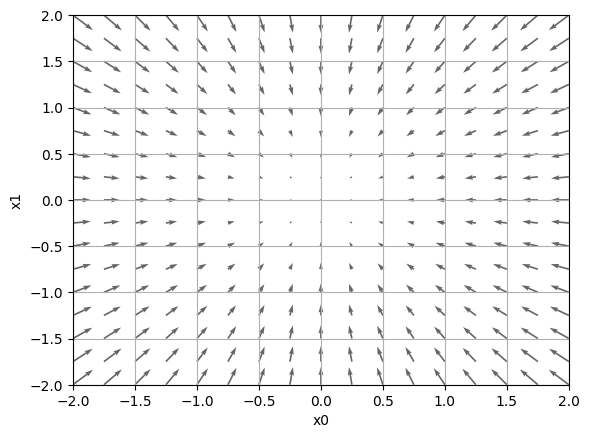

In [9]:
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 値を元に戻す

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


if __name__ == "__main__":
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.grid()
    plt.draw()
    plt.show()

In [10]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x


def function_2(x):
    return x[0] ** 2 + x[1] ** 2


init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [11]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [12]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [13]:
import sys, os

sys.path.append(os.path.join(os.pardir, "deep-learning-from-scratch"))
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


net = simpleNet()
print(f"Net:{net.W}\n")

x = np.array([0.6, 0.9])
p = net.predict(x)
print(f"predict:{p}\n")

print(f"Maxidx:{np.argmax(p)}\n")

t = np.array([0, 1, 0])
print(f"loss:{net.loss(x, t)}\n")


def f(W):
    return net.loss(x, t)


dW = numerical_gradient(f, net.W)
print(f"dW{dW}")

Net:[[-0.7380301  -0.27395917 -0.1295655 ]
 [-1.15968668 -0.06798083  1.48226351]]

predict:[-1.48653607 -0.22555825  1.25629786]

Maxidx:2

loss:1.7377397660549367

dW[[ 0.02991054 -0.49444924  0.4645387 ]
 [ 0.04486581 -0.74167386  0.69680805]]


In [14]:
# 学習率（歩幅）
learning_rate = 0.1

for i in range(1000000):
    net.W = net.W - learning_rate * dW
    i += 1
# 【重要】重みの更新（勾配降下法）
# W から、勾配 dW に学習率を掛けたものを引く

print(f"更新後の重み: {net.W}\n")

# 学習後の「自信」を見てみる
print(f"学習後の自信: {net.predict(x)}\n")

# 損失（苦痛）がどうなったか見てみる
print(f"学習後の損失: {net.loss(x, t)}\n")

更新後の重み: [[ -2991.79205392  49444.64994352 -46453.99944527]
 [ -4487.74072527  74167.31786695 -69679.32255068]]

学習後の自信: [ -5834.04188509  96417.37604637 -90583.78996278]

学習後の損失: -9.999999505838704e-08



In [15]:
import sys, os

sys.path.append(os.path.join(os.pardir, "deep-learning-from-scratch"))
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(
            hidden_size,
            output_size,
        )
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

        return grads

In [16]:
# 入力784個（画像の画素数）、隠れ層100個、出力10個（0~9の数字）
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

print("重みの形:")
print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

# ダミー入力データ（100枚の画像を想定）
x = np.random.rand(100, 784)

# 推論してみる
y = net.predict(x)

# 結果の確認
print(y.shape)
# -> (100, 10) と出れば大成功！
# 「100枚の画像それぞれに対して、0~9の確率(10個)を出した」という意味。

重みの形:
(784, 100)
(100,)
(100, 10)
(10,)
(100, 10)


In [17]:
# coding: utf-8
import sys, os
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads["W2"] = np.dot(z1.T, dy)
        grads["b2"] = np.sum(dy, axis=0)

        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads["W1"] = np.dot(x.T, da1)
        grads["b1"] = np.sum(da1, axis=0)

        return grads

In [30]:
import numpy as np
from dataset.mnist import load_mnist

# from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
# 1エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

# ハイパーパラメータ
iters_sum = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_sum):
    # 1. ミニバッチ取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 2. 勾配計算
    grad = network.gradient(x_batch, t_batch)  # ※ここがnumericalだと激遅注意

    # 3. パラメータ更新
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    # 4. 損失記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # ★修正箇所：1エポックごとに精度を表示
    if i % iter_per_epoch == 0:
        # 全データでの精度計算（ちょっと時間がかかる処理）
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)

        train_acc_list.append(train_acc)
        # 記録用のリストに追加（test側も記録しておくと良い）
        # test_acc_list.append(test_acc)

        print(f"train acc, test acc | {train_acc:.4f}, {test_acc:.4f}")

train acc, test acc | 0.0953, 0.0918
train acc, test acc | 0.7898, 0.7952
train acc, test acc | 0.8799, 0.8823
train acc, test acc | 0.8995, 0.9044
train acc, test acc | 0.9081, 0.9134
train acc, test acc | 0.9146, 0.9179
train acc, test acc | 0.9192, 0.9226
train acc, test acc | 0.9236, 0.9263
train acc, test acc | 0.9271, 0.9293
train acc, test acc | 0.9312, 0.9324
train acc, test acc | 0.9341, 0.9351
train acc, test acc | 0.9378, 0.9392
train acc, test acc | 0.9403, 0.9403
train acc, test acc | 0.9420, 0.9417
train acc, test acc | 0.9439, 0.9424
train acc, test acc | 0.9466, 0.9440
train acc, test acc | 0.9483, 0.9469
